In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import keras
from keras import Sequential
from keras.layers import SimpleRNN
from keras import models
from keras import layers
from keras.layers import Dropout
from keras.models import Sequential
import tensorflow as tf
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.regularizers import l1
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

from keras import regularizers

In [4]:
Total_X_data = pd.read_csv("X_data.csv")
Total_Y_data = pd.read_csv("Y_data_voltage.csv")

Total_Y_data.drop("Unnamed: 0", axis=1, inplace=True)
Total_X_data.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
Total_X_data = Total_Y_data.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 49, 55, 56, 57, 61, 62, 63, 64, 65, 67, 68, 69, 70, 75]]

In [6]:
Y_test = Total_Y_data[:1068]
X_test = Total_X_data[:1068]

In [7]:
Y_data = Total_Y_data[1068:]
X_data = Total_X_data[1068:]

In [8]:
X_data.shape

(4276, 49)

In [9]:
Y_data.shape

(4276, 250)

In [67]:
aa= pd.read_csv("X_data.csv")
aa.drop("Unnamed: 0", axis=1, inplace=True)
b = aa.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 49, 55, 56, 57, 61, 62, 63, 64, 65, 67, 68, 69, 70, 75]]

In [68]:
b.columns

Index(['V_myo(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)', 'i_NaK_max(uA)',
       'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)', 'Na_o(millimolar)',
       'Ca_TRPN_Max(mM)', 'g_t(microS)', 'a_endo', 'b_endo', 'g_ss(microS)',
       'g_K1(microS)', 'g_f(microS)', 'g_B_Na(microS)', 'g_B_Ca(microS)',
       'Ca_o(millimolar)', 'g_D(um3_per_ms)', 'J_R(um3_per_ms)',
       'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)', 'eta',
       'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'g_CaB(mM_per_mV_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)',
       'k_on(per_mM_per_ms)', 'k_Ref_off(per_ms)', 'gamma_trpn',
       'Ca_50ref(mM)', 'A_1', 'A_2', 'A_3', 'V_L(mV)', 'del_VL(mV)', 'phi_L',
       't_L(ms)', 'tau_L(ms)', 'phi_R', 'theta_R', 'K_RyR(mM)', 'K_L(mM)',
       'tau_s_ss'],
      dtype='object')

## scaling and splitting

In [10]:
scaler_y = StandardScaler().fit(Y_data)
scaler_x = StandardScaler().fit(X_data)

Y_data = scaler_y.transform(Y_data)
X_data = scaler_x.transform(X_data)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_data,Y_data,test_size=0.2,random_state=357, shuffle=True)

In [12]:
X_train.shape

(3420, 49)

In [13]:
X_train = X_train.reshape(3420,49,1)

## Model Train CNN

In [14]:
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [15]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_r_square', factor=0.1,
                              patience=5, min_lr=0.00001)

callbacks = [callback,reduce_lr]

In [16]:
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D,Dropout,Dense,BatchNormalization,GlobalMaxPooling1D

In [17]:
from keras import layers

In [18]:
model1 = Sequential()
model1.add(Conv1D(128, 10, padding ="valid", activation='relu', input_shape=(X_train.shape[1], 1)))

model1.add(layers.MaxPooling1D(1))

model1.add(Conv1D(128, 10,activation='relu'))

model1.add(MaxPooling1D(1))

model1.add(Conv1D(128, 10, activation='relu'))


model1.add(MaxPooling1D(1))


model1.add(Conv1D(128, 10, activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(500, activation='relu'))
model1.add(Dense(250))
print(model1.summary())
model1.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=[r_square])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 128)           1408      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 31, 128)           163968    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 31, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 22, 128)           163968    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 22, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 13, 128)           1

In [19]:
history1 = model1.fit(X_train, y_train,
                  epochs=20,
                  batch_size=64,
                  validation_data=(X_val.reshape(X_val.shape[0],X_val.shape[1],1), y_val), callbacks=[callbacks])

Epoch 1/20
54/54 [==============================] - 4s 74ms/step - loss: 0.3464 - r_square: 0.6463 - val_loss: 0.1772 - val_r_square: 0.8314
Epoch 2/20
54/54 [==============================] - 4s 67ms/step - loss: 0.1617 - r_square: 0.8337 - val_loss: 0.1430 - val_r_square: 0.8641
Epoch 3/20
54/54 [==============================] - 4s 65ms/step - loss: 0.1344 - r_square: 0.8611 - val_loss: 0.1314 - val_r_square: 0.8755
Epoch 4/20
54/54 [==============================] - 4s 65ms/step - loss: 0.1220 - r_square: 0.8743 - val_loss: 0.1230 - val_r_square: 0.8834
Epoch 5/20
54/54 [==============================] - 4s 66ms/step - loss: 0.1203 - r_square: 0.8753 - val_loss: 0.2178 - val_r_square: 0.7929
Epoch 6/20
54/54 [==============================] - 4s 67ms/step - loss: 0.1323 - r_square: 0.8644 - val_loss: 0.1218 - val_r_square: 0.8829
Epoch 7/20
54/54 [==============================] - 4s 66ms/step - loss: 0.1088 - r_square: 0.8868 - val_loss: 0.1383 - val_r_square: 0.8690
Epoch 8/20
54

Text(0.5, 0, 'Epochs')

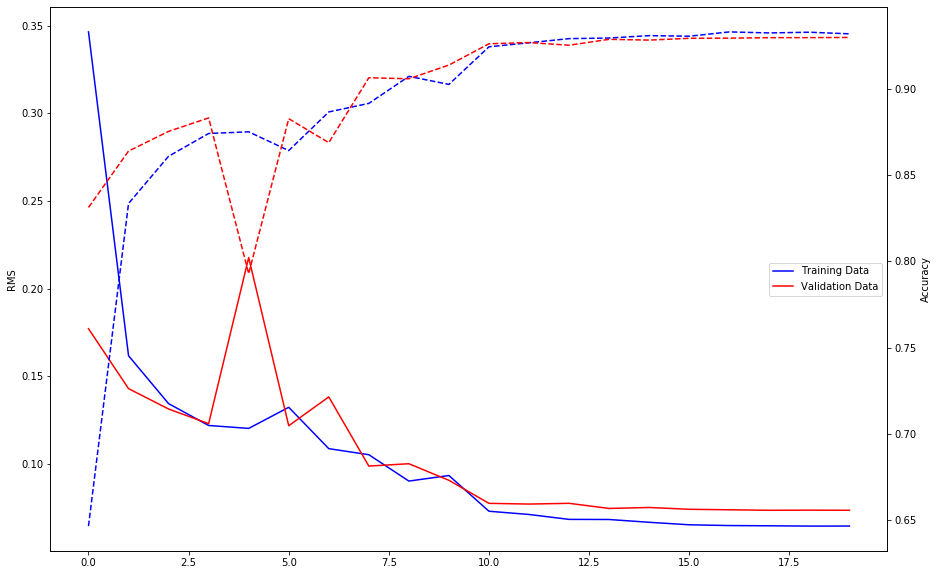

In [20]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(history1.history['loss'][:2000],label='Training Data',c='blue')
ax.plot(history1.history['val_loss'][:2000],label='Validation Data',c='red')
plt.ylabel('RMS')
plt.legend(loc='center right')

ax2 = ax.twinx()
ax2.plot(history1.history['r_square'][:2000],'--',c='blue')
ax2.plot(history1.history['val_r_square'][:2000],'--',c='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

## Training the whole model and prediction

In [21]:
##X_data and Y_data are already scaled

X_train_all = X_data
Y_train_all = Y_data


In [22]:
X_train_all = X_train_all.reshape(4276,49,1)

In [23]:
model2 = Sequential()
model2.add(Conv1D(128, 10, padding ="valid", activation='relu', input_shape=(X_train.shape[1], 1)))

model2.add(layers.MaxPooling1D(1))

model2.add(Conv1D(128, 10,activation='relu'))

model2.add(MaxPooling1D(1))

model2.add(Conv1D(128, 10, activation='relu'))


model2.add(MaxPooling1D(1))


model2.add(Conv1D(128, 10, activation='relu'))

model2.add(layers.Flatten())
model2.add(layers.Dense(500, activation='relu'))
model2.add(Dense(250))
print(model2.summary())
model2.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=[r_square])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 40, 128)           1408      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 40, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 31, 128)           163968    
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 31, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 22, 128)           163968    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 22, 128)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 13, 128)          

In [24]:
history2 = model2.fit(X_train_all, Y_train_all,
                  epochs=20,
                  batch_size=64,
                  )

Epoch 1/20
67/67 [==============================] - 4s 63ms/step - loss: 0.3301 - r_square: 0.6640
Epoch 2/20
67/67 [==============================] - 4s 66ms/step - loss: 0.1444 - r_square: 0.8517
Epoch 3/20
67/67 [==============================] - 4s 65ms/step - loss: 0.1297 - r_square: 0.8675
Epoch 4/20
67/67 [==============================] - 4s 67ms/step - loss: 0.1104 - r_square: 0.8870
Epoch 5/20
67/67 [==============================] - 4s 65ms/step - loss: 0.1007 - r_square: 0.8968
Epoch 6/20
67/67 [==============================] - 4s 65ms/step - loss: 0.0995 - r_square: 0.8987
Epoch 7/20
67/67 [==============================] - 4s 65ms/step - loss: 0.0988 - r_square: 0.8992
Epoch 8/20
67/67 [==============================] - 4s 65ms/step - loss: 0.0964 - r_square: 0.9014
Epoch 9/20
67/67 [==============================] - 4s 65ms/step - loss: 0.0986 - r_square: 0.8999
Epoch 10/20
67/67 [==============================] - 4s 65ms/step - loss: 0.0911 - r_square: 0.9069
Epoch 11/

In [25]:
## Prediction on Test data

In [26]:
X_test = Total_X_data[:1068]
Y_test = Total_Y_data[:1068]

In [27]:
Test_X_data = scaler_x.transform(X_test)
Test_Y_data = scaler_y.transform(Y_test)

In [28]:
type(Test_X_data)

numpy.ndarray

In [29]:
Test_X_data = Test_X_data.reshape(1068,49,1)

In [30]:
ypred2 = model1.predict(Test_X_data)
print(r2_score(Test_Y_data,ypred2))

0.9300796776061174


### Feature Importance 

In [35]:
 names = ['V_myo(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)', 'i_NaK_max(uA)',
       'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)', 'Na_o(millimolar)',
       'Ca_TRPN_Max(mM)', 'g_Na(microS)', 'g_t(microS)', 'a_endo', 'b_endo',
       'g_ss(microS)', 'g_K1(microS)', 'g_f(microS)', 'g_B_Na(microS)',
       'g_B_Ca(microS)', 'Ca_o(millimolar)', 'g_D(um3_per_ms)',
       'J_R(um3_per_ms)', 'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)',
       'eta', 'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'g_CaB(mM_per_mV_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)',
       'k_on(per_mM_per_ms)', 'k_Ref_off(per_ms)', 'gamma_trpn',
       'Ca_50ref(mM)', 'A_1', 'A_2', 'A_3', 'V_L(mV)', 'del_VL(mV)', 'phi_L',
       't_L(ms)', 'tau_L(ms)', 'phi_R', 'theta_R', 'K_RyR(mM)', 'K_L(mM)',
       'tau_s_ss'
]

In [36]:
from scipy.signal import find_peaks
from scipy.signal import peak_widths


def aggregated_features(X,aplimit=-20):
  action_potentials = []
  ap_amps = []
  widths = []
  widths_plotting = []

  for x in X:
    peaks,d = find_peaks(x, height=aplimit)
    if len(peaks)>0:
      ap_amps.append(d['peak_heights'])
    else:
      ap_amps.append(np.array([]))

    results_half = peak_widths(x, peaks, rel_height=0.5)
    widths.append(results_half[0])  # widths
    widths_plotting.append(results_half[1:])
    
    
    action_potentials.append(peaks)
  return np.array(action_potentials),np.array(ap_amps),np.array(widths),np.array(widths_plotting)

In [37]:
import seaborn as sns
def PFI_plotter_same(PFI,names,ap_times,save=False,filename=None):

  first_aptime = np.array([prap[0] if len(prap)>0 else np.nan for prap in ap_times])*0.025
  second_aptime = np.array([prap[1] if len(prap)>1 else np.nan for prap in ap_times])*0.025
  third_aptime = np.array([prap[2] if len(prap)>2 else np.nan for prap in ap_times])*0.025
  
  
  colors = sns.color_palette("Paired", len(names))

  fig = plt.figure(figsize=(15,10))
  ax = fig.add_subplot(111)
  ax.set_prop_cycle('color', colors)
  
  x_array = [f*0.025 for f in range(PFI.shape[2])]
  #plt.hist(first_aptime, weights=np.ones_like(first_aptime),bins=60,alpha=0.3)
  #plt.hist(second_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.3)
  #plt.hist(third_aptime, weights=np.ones_like(third_aptime),bins=60,alpha=0.3)
  
  
  for i in range(PFI.shape[1]):
    
    color = next(ax._get_lines.prop_cycler)['color']


    # Calculate min and max values of PFI for each variable
    sen_max = np.max(PFI[:,i,:],axis=0)
    sen_min = np.min(PFI[:,i,:],axis=0)
    plt.fill_between(x_array,sen_max,sen_min,facecolor=color,alpha=0.2) ;



    # Calculate mean and std values of PFI for each variable
    mu = np.mean(PFI[:,i,:],axis=0)
    std = np.std(PFI[:,i,:],axis=0)
    
    upper = mu+std
    lower = mu-std

    plt.fill_between(x_array,lower,upper,facecolor=color,alpha=0.5);


    plt.plot(x_array,mu,c=color,linewidth=2,label=names[i]);
    plt.ylim((np.min(PFI)-0.5,np.max(PFI)+0.5))
    plt.legend(loc='right')

In [38]:
def PFI_plotter(PFI,names,ap_times,save=False,filename='None'):

  plt.figure(figsize=(15,160))
  #first_aptime = np.array([prap[0] if len(prap)>0 else np.nan for prap in ap_times])*0.025
  #second_aptime = np.array([prap[1] if len(prap)>1 else np.nan for prap in ap_times])*0.025
  #third_aptime = np.array([prap[2] if len(prap)>2 else np.nan for prap in ap_times])*0.025
  

  x_array = [f*0.025 for f in range(PFI.shape[2])]
  for i in range(PFI.shape[1]):
    

    plt.subplot(PFI.shape[1],1,i+1);

    # Calculate min and max values of PFI for each variable
    sen_max = np.max(PFI[:,i,:],axis=0)
    sen_min = np.min(PFI[:,i,:],axis=0)
    plt.fill_between(x_array,sen_max,sen_min) ;



    # Calculate mean and std values of PFI for each variable
    mu = np.mean(PFI[:,i,:],axis=0)
    std = np.std(PFI[:,i,:],axis=0)
    
    upper = mu+std
    lower = mu-std

    plt.fill_between(x_array,lower,upper,facecolor='lightblue',label=names[i]) ;


    plt.plot(x_array,mu,c='r',linewidth=1);
    plt.ylim((np.min(PFI)-0.5,np.max(PFI)+0.5))
    #plt.hist(first_aptime, weights=np.ones_like(first_aptime),bins=60,alpha=0.2)
    #plt.hist(second_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.2)
    #plt.hist(third_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.2)
    #plt.legend(loc='right')
    plt.legend().draggable()
    #plt.legend(loc='center left', bbox_to_anchor=(10,0.5))

In [39]:
from copy import copy

def Permuted_feature_impotance(_X,y,model,seeds=[234]):
  
  base_yhat = model.predict(_X) # baseline predictions
  base_line = np.array(
      [mean_squared_error(y[:,c],base_yhat[:,c]) #Baseline error
       for c in range(base_yhat.shape[1])])
  
  PFI = np.zeros((len(seeds),_X.shape[1],y.shape[1])) # Empty array for importances
  
  for i,seed in enumerate(seeds):
    
    np.random.RandomState(seed) # Sets the random state for numpy
    for j in range(Test_X_data.shape[1]): # Iterate over columns
      
      X = copy(_X)
      X[:,j] = np.random.permutation(X[:,j]) # Permute one column

      perm_yhat = model.predict(X)
      


      # Permuted Error
      FI_perm = np.array([mean_squared_error(y[:,c],perm_yhat[:,c]) for c in range(perm_yhat.shape[1])]) 
      PFI[i,j,:] = FI_perm - base_line # Feature importance
  
  return PFI

In [40]:
ap_times,amp,w,wp = aggregated_features(scaler_y.inverse_transform(Test_Y_data))

In [41]:
seeds = [123*i for i in range(1,4)]
PFI = Permuted_feature_impotance(Test_X_data,Test_Y_data,model2,seeds)

In [70]:
names = ['V_myo(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)', 'i_NaK_max(uA)',
       'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)', 'Na_o(millimolar)',
       'Ca_TRPN_Max(mM)', 'g_t(microS)', 'a_endo', 'b_endo',
       'g_ss(microS)', 'g_K1(microS)', 'g_f(microS)', 'g_B_Na(microS)',
       'g_B_Ca(microS)', 'Ca_o(millimolar)', 'g_D(um3_per_ms)',
       'J_R(um3_per_ms)', 'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)',
       'eta', 'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'g_CaB(mM_per_mV_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)',
       'k_on(per_mM_per_ms)', 'k_Ref_off(per_ms)', 'gamma_trpn',
       'Ca_50ref(mM)', 'A_1', 'A_2', 'A_3', 'V_L(mV)', 'del_VL(mV)', 'phi_L',
       't_L(ms)', 'tau_L(ms)', 'phi_R', 'theta_R', 'K_RyR(mM)', 'K_L(mM)',
       'tau_s_ss'
]

Text(0, 0.5, 'Feature Importance')

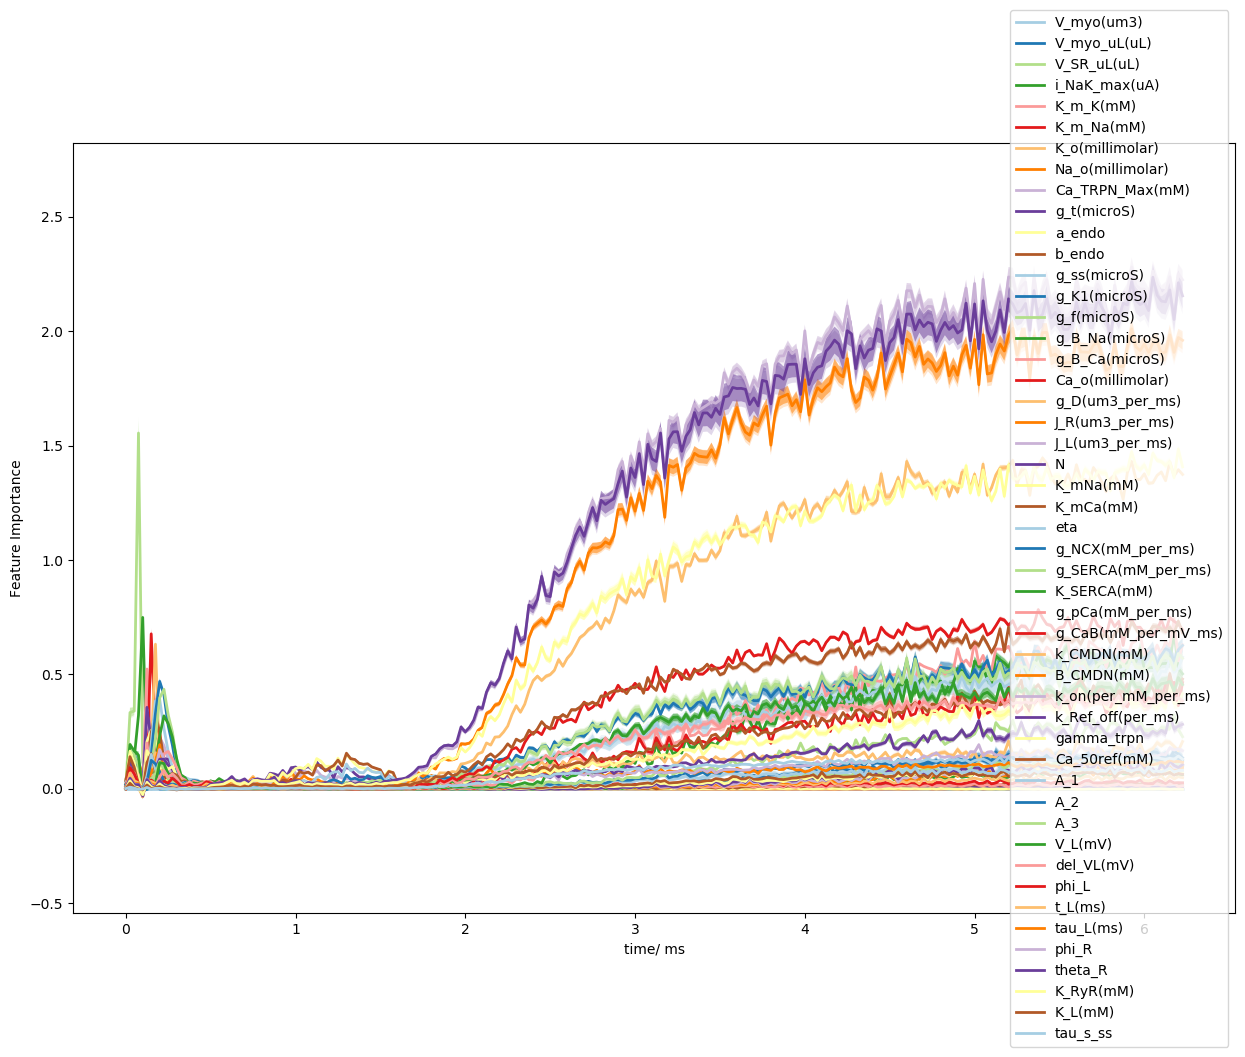

In [72]:
plt.style.use('default')
PFI_plotter_same(PFI,names,ap_times)
plt.xlabel('time/ ms')
plt.ylabel('Feature Importance')

In [44]:
PFI.shape

(3, 49, 250)

In [ ]:
PFI = Permuted_feature_impotance(Test_X_data,Test_Y_data,model2,seeds)

In [45]:
PFI_15 = PFI[:,:,0:15]

In [46]:
perm_1 = pd.DataFrame(PFI_15[0].T).mean().to_numpy()
perm_2 = pd.DataFrame(PFI_15[1].T).mean().to_numpy()
perm_3 = pd.DataFrame(PFI_15[2].T).mean().to_numpy()

In [47]:
df = pd.DataFrame((perm_1 + perm_2 + perm_3)/3)


In [48]:
df.columns = ['Importance']


In [49]:
df

,Importance
0,0.000000
1,0.029538
2,0.163128
3,0.096134
4,0.065861
5,0.071236
6,0.069112
7,0.055099
8,0.063001
9,0.063339


In [76]:
len(df[df['Importance'] > 0.06])

21

In [57]:
PFI_new = PFI_15[:, [2,3,4,5,6,8,9,19,20,21,22,23,24,25,26,27,28,32,33,34,35] , :]

In [82]:
PFI_new.shape

(3, 21, 15)

In [83]:
names = ['V_SR_uL(uL)', 'i_NaK_max(uA)',
       'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)', 
       'Ca_TRPN_Max(mM)', 'g_t(microS)', 'J_R(um3_per_ms)',
 'J_L(um3_per_ms)',
 'N',
 'K_mNa(mM)',
 'K_mCa(mM)',
 'eta',
 'g_NCX(mM_per_ms)',
 'g_SERCA(mM_per_ms)',
 'K_SERCA(mM)',
 'g_pCa(mM_per_ms)',
         'k_on(per_mM_per_ms)', 'k_Ref_off(per_ms)', 'gamma_trpn', 'Ca_50ref(mM)'
         
]

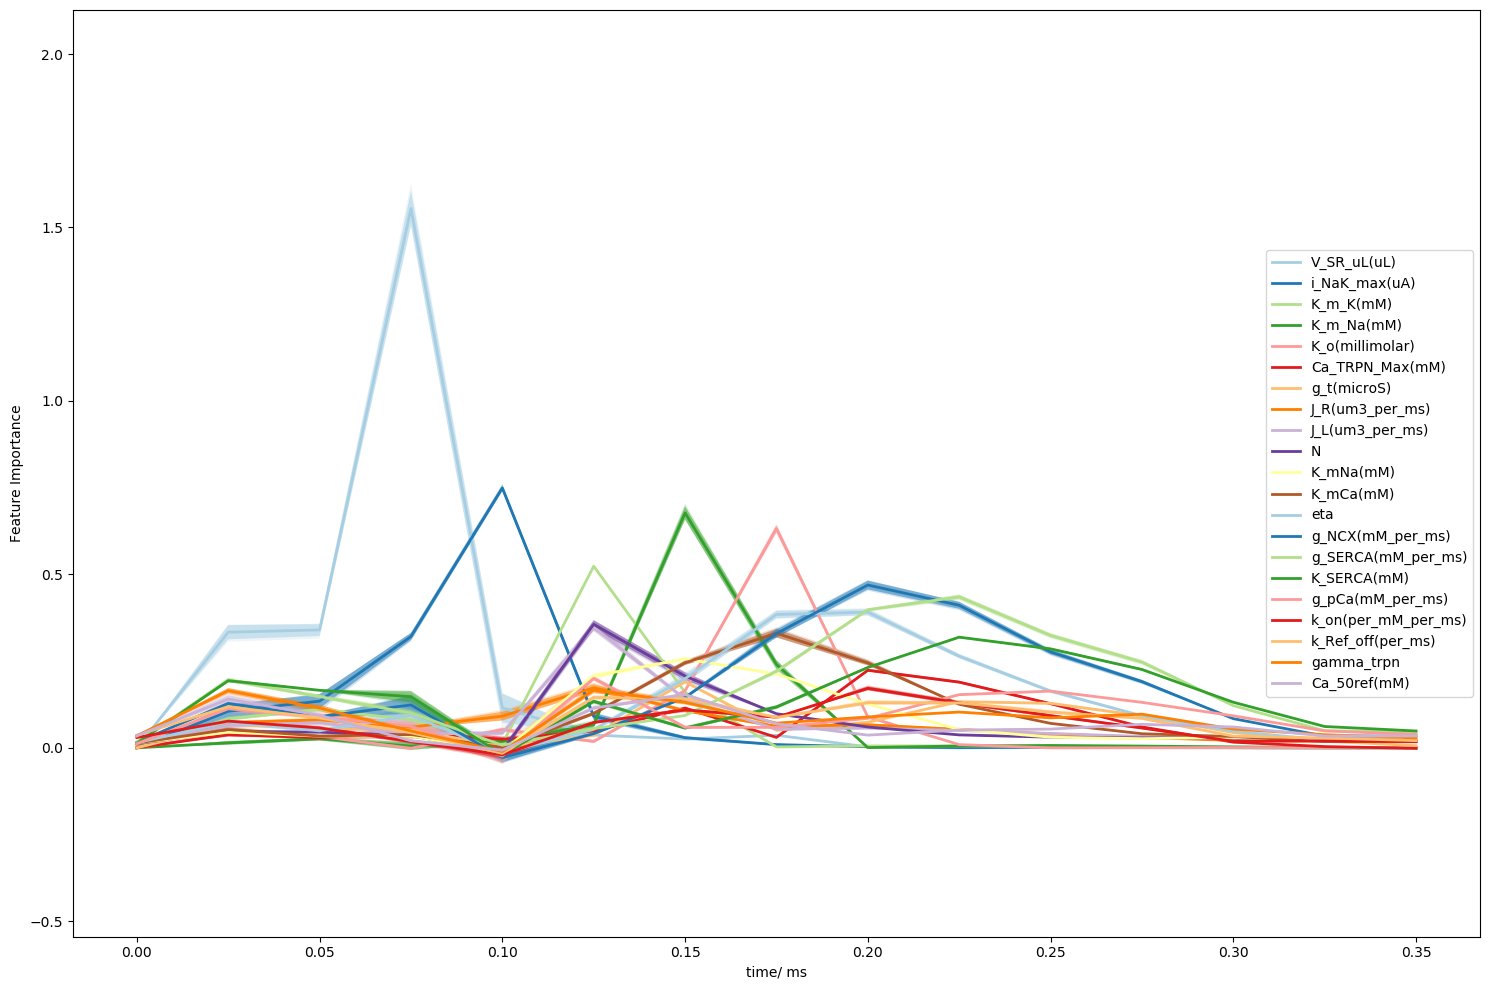

In [104]:
plt.style.use('default')
PFI_plotter_same(PFI_new,names,ap_times)
plt.xlabel('time/ ms')
plt.ylabel('Feature Importance')
plt.tight_layout()

In [86]:
PFI_new1 = PFI[:, [2,3,4,5,6,8,9,19,20,21,22,23,24,25,26,27,28,32,33,34,35] , :]

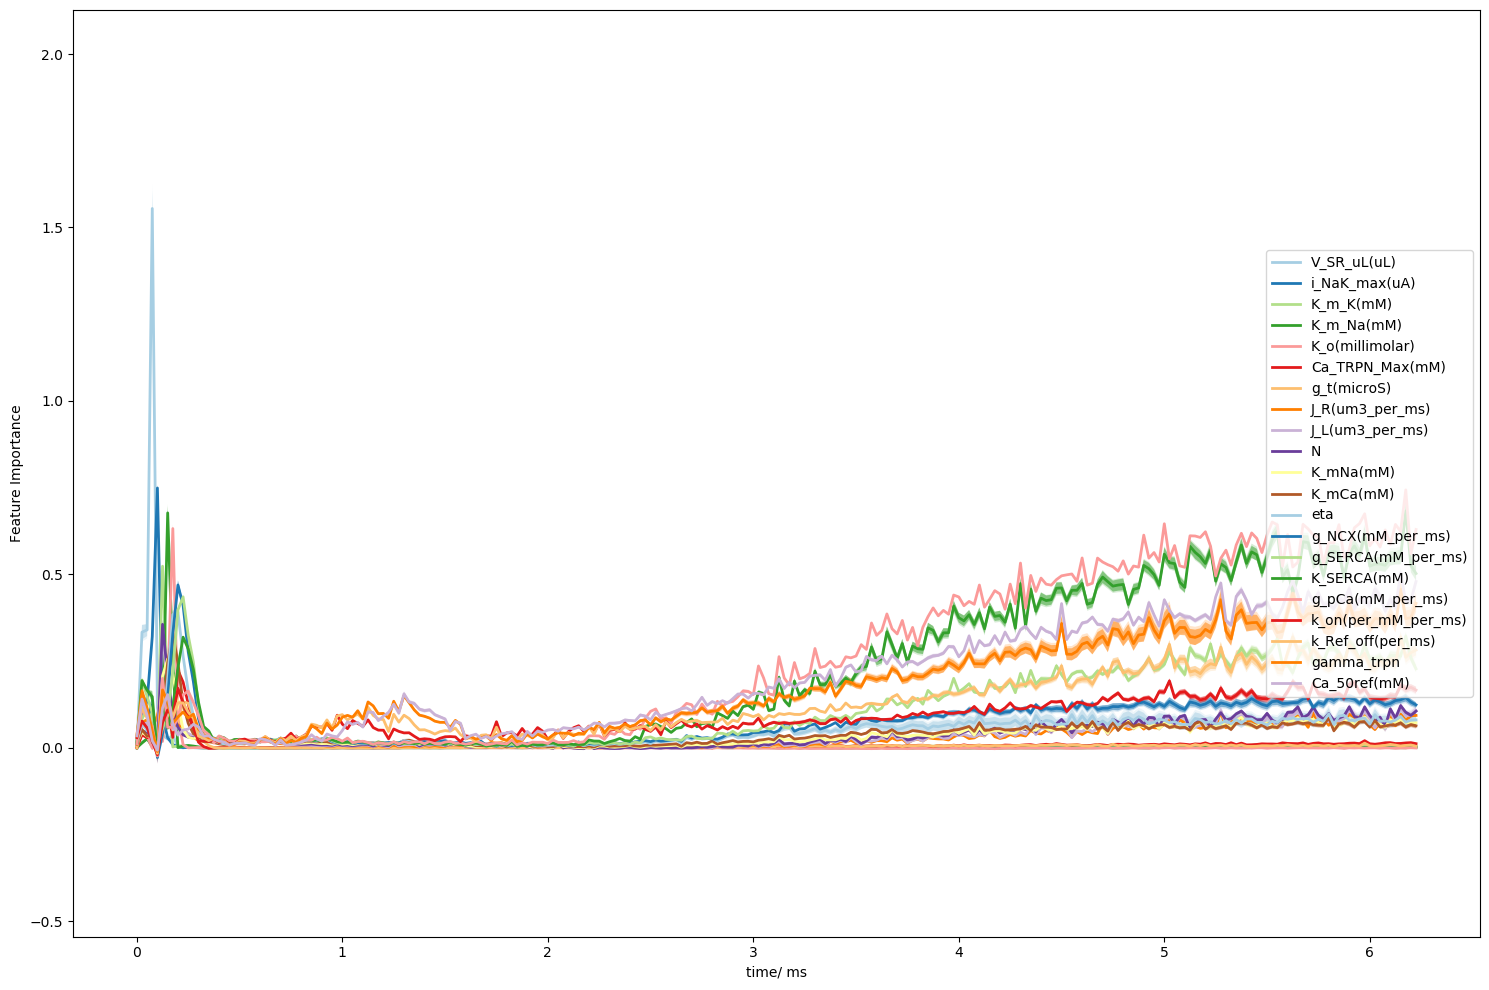

In [89]:
plt.style.use('default')
PFI_plotter_same(PFI_new1,names,ap_times)
plt.xlabel('time/ ms')
plt.ylabel('Feature Importance')
plt.tight_layout()

In [90]:
x_axis = np.array([i*0.025 for i in range(250)])

In [91]:
Total_Y_data.loc[0]

0     -80.501460
1     -73.620314
2     -67.357399
3     -61.382787
4     -54.541782
         ...    
245    21.758281
246    22.005953
247    22.033896
248    21.922441
249    21.721304
Name: 0, Length: 250, dtype: float64

In [92]:
stat = Y_test.describe()

In [93]:
stat = stat.T

In [94]:
mu0 = stat['mean'].to_numpy()

In [95]:
std0 = stat['std'].to_numpy()

In [96]:
upper0 = mu0+std0
lower0 = mu0-std0

C:\Users\Ashesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


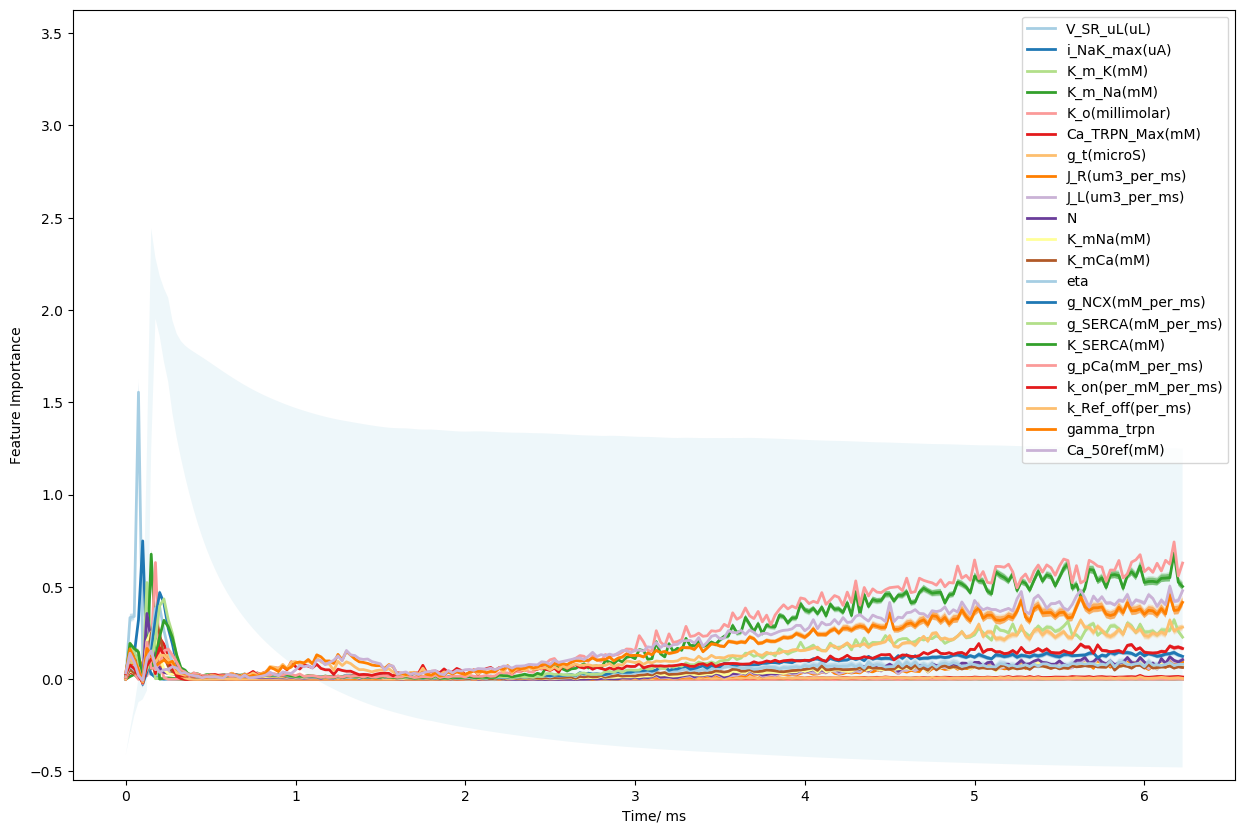

In [102]:
colors = sns.color_palette("Paired", len(names))

fig = plt.figure(figsize=(15,10))

plt.fill_between(x_axis,lower0*0.02+60*0.02,upper0*0.02+60*0.02,facecolor='lightblue',alpha=0.2);


ax = fig.add_subplot(111)
ax.set_prop_cycle('color', colors)

x_array = [f*0.025 for f in range(PFI_new1.shape[2])]
#plt.hist(first_aptime, weights=np.ones_like(first_aptime),bins=60,alpha=0.3)
#plt.hist(second_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.3)
#plt.hist(third_aptime, weights=np.ones_like(third_aptime),bins=60,alpha=0.3)


for i in range(PFI_new1.shape[1]):

  color = next(ax._get_lines.prop_cycler)['color']


  # Calculate min and max values of PFI for each variable
  sen_max = np.max(PFI_new1[:,i,:],axis=0)
  sen_min = np.min(PFI_new1[:,i,:],axis=0)
  plt.fill_between(x_array,sen_max,sen_min,facecolor=color,alpha=0.2) ;



  # Calculate mean and std values of PFI for each variable
  mu = np.mean(PFI_new1[:,i,:],axis=0)
  std = np.std(PFI_new1[:,i,:],axis=0)

  upper = mu+std
  lower = mu-std

  plt.fill_between(x_array,lower,upper,facecolor=color,alpha=0.5);

  
  plt.plot(x_array,mu,c=color,linewidth=2,label=names[i]);
  plt.ylim((np.min(PFI_new1)-0.5,np.max(PFI_new1)+2))
  plt.ylabel('Feature Importance')
  plt.xlabel('Time/ ms')
  





  plt.legend()

In [ ]:
## checking for first 5 milliseconds

In [155]:
PFI_5 = PFI[:,:,0:15]

In [156]:
perm_1 = pd.DataFrame(PFI_5[0].T).mean().to_numpy()
perm_2 = pd.DataFrame(PFI_5[1].T).mean().to_numpy()
perm_3 = pd.DataFrame(PFI_5[2].T).mean().to_numpy()
df_1 = pd.DataFrame((perm_1 + perm_2 + perm_3)/3)
df_1.columns = ['Importance']



In [157]:
df_1[df_1['Importance'] > 0.08]

,Importance
2,0.163128
3,0.096134
23,0.090746
24,0.123578
25,0.156159
26,0.163648
27,0.140629
28,0.085334
34,0.080978


In [158]:
PFI_new = PFI[:, [2,3,12,19,25,26,27,33,34] , :]

In [159]:
PFI_new_1 = PFI_5[:, [2,3,12,19,25,26,27,33,34] , :]

In [160]:
names = ['V_myo(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)', 'i_NaK_max(uA)',
       'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)', 'Na_o(millimolar)',
       'Ca_TRPN_Max(mM)', 'g_t(microS)', 'a_endo', 'b_endo',
       'g_ss(microS)', 'g_K1(microS)', 'g_f(microS)', 'g_B_Na(microS)',
       'g_B_Ca(microS)', 'Ca_o(millimolar)', 'g_D(um3_per_ms)',
       'J_R(um3_per_ms)', 'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)',
       'eta', 'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'g_CaB(mM_per_mV_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)',
       'k_on(per_mM_per_ms)', 'k_Ref_off(per_ms)', 'gamma_trpn',
       'Ca_50ref(mM)', 'A_1', 'A_2', 'A_3', 'V_L(mV)', 'del_VL(mV)', 'phi_L',
       't_L(ms)', 'tau_L(ms)', 'phi_R', 'theta_R', 'K_RyR(mM)', 'K_L(mM)',
       'tau_s_ss'
]

In [161]:
j = [2,3,12,19,25,26,27,33,34]

for i in range(49):
    if i in j:
        print(names[i])

V_SR_uL(uL)
i_NaK_max(uA)
g_ss(microS)
J_R(um3_per_ms)
g_NCX(mM_per_ms)
g_SERCA(mM_per_ms)
K_SERCA(mM)
k_Ref_off(per_ms)
gamma_trpn


In [162]:
names = ['V_SR_uL(uL)',
'i_NaK_max(uA)',
'g_ss(microS)',
'J_R(um3_per_ms)',
'g_NCX(mM_per_ms)',
'g_SERCA(mM_per_ms)',
'K_SERCA(mM)',
'k_Ref_off(per_ms)',
'gamma_trpn']

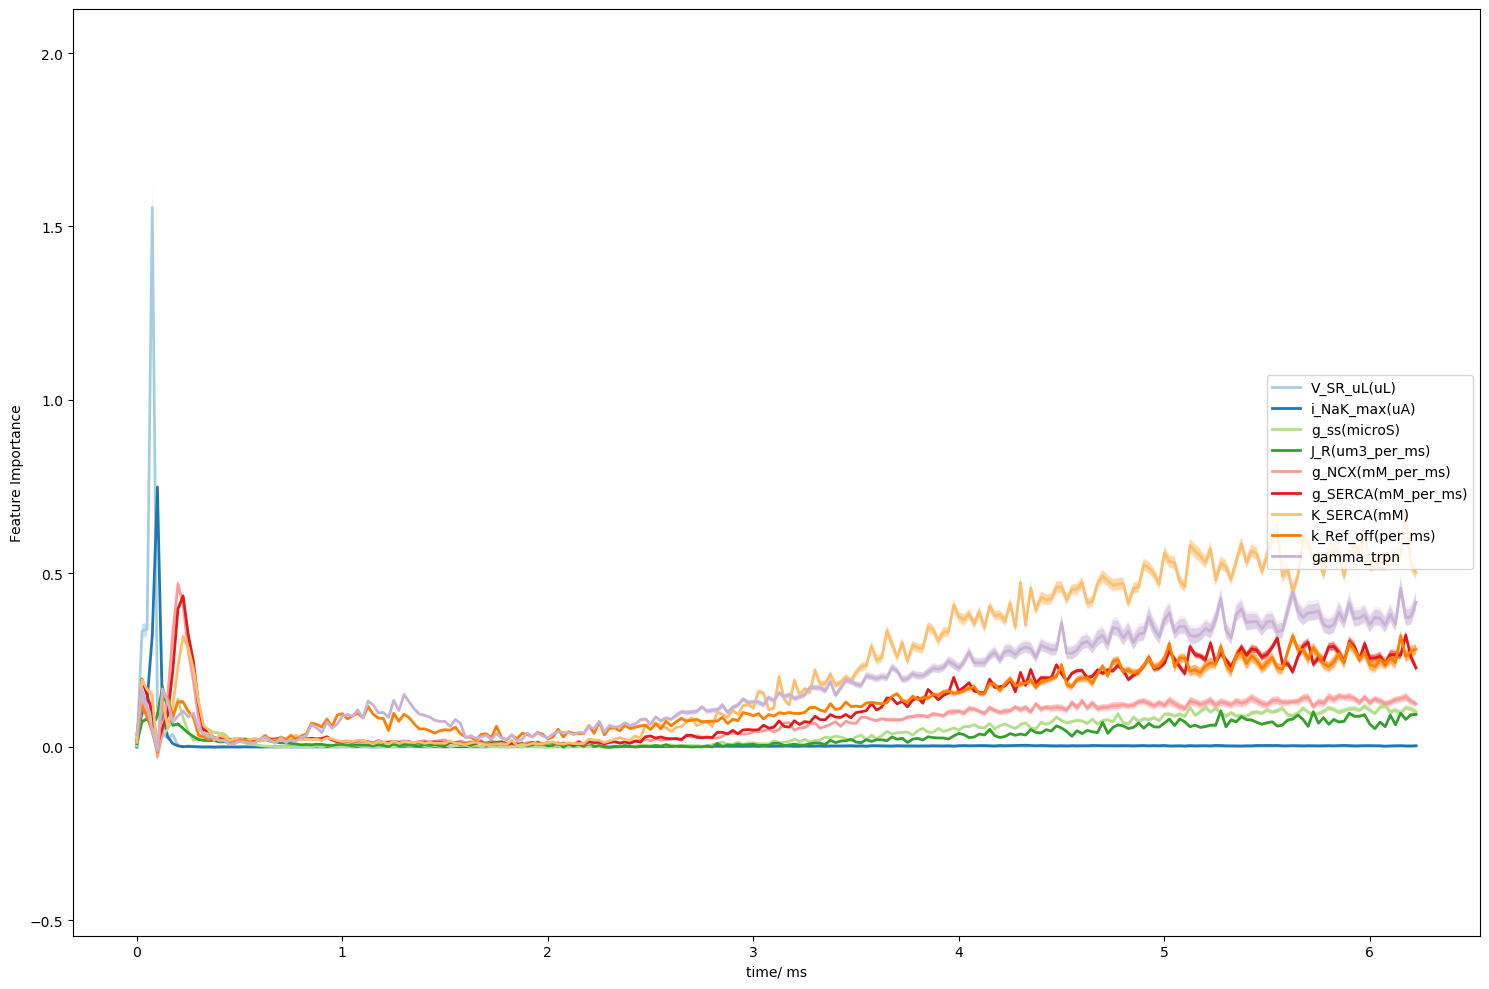

In [163]:
plt.style.use('default')
PFI_plotter_same(PFI_new,names,ap_times)
plt.xlabel('time/ ms')
plt.ylabel('Feature Importance')
plt.tight_layout()

C:\Users\Ashesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


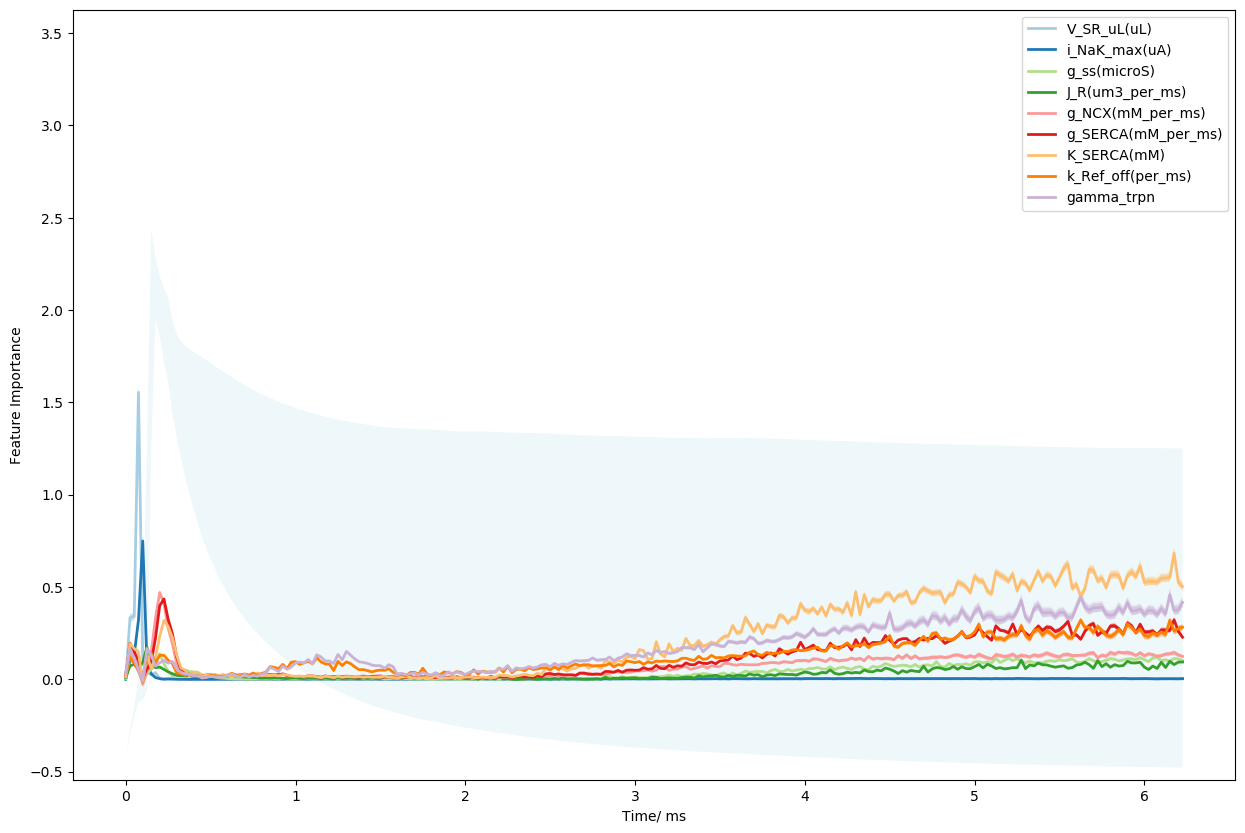

In [164]:
colors = sns.color_palette("Paired", len(names))

fig = plt.figure(figsize=(15,10))

plt.fill_between(x_axis,lower0*0.02+60*0.02,upper0*0.02+60*0.02,facecolor='lightblue',alpha=0.2);


ax = fig.add_subplot(111)
ax.set_prop_cycle('color', colors)

x_array = [f*0.025 for f in range(PFI_new.shape[2])]
#plt.hist(first_aptime, weights=np.ones_like(first_aptime),bins=60,alpha=0.3)
#plt.hist(second_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.3)
#plt.hist(third_aptime, weights=np.ones_like(third_aptime),bins=60,alpha=0.3)


for i in range(PFI_new.shape[1]):

  color = next(ax._get_lines.prop_cycler)['color']


  # Calculate min and max values of PFI for each variable
  sen_max = np.max(PFI_new[:,i,:],axis=0)
  sen_min = np.min(PFI_new[:,i,:],axis=0)
  plt.fill_between(x_array,sen_max,sen_min,facecolor=color,alpha=0.2) ;



  # Calculate mean and std values of PFI for each variable
  mu = np.mean(PFI_new[:,i,:],axis=0)
  std = np.std(PFI_new[:,i,:],axis=0)

  upper = mu+std
  lower = mu-std

  plt.fill_between(x_array,lower,upper,facecolor=color,alpha=0.5);

  
  plt.plot(x_array,mu,c=color,linewidth=2,label=names[i]);
  plt.ylim((np.min(PFI_new)-0.5,np.max(PFI_new)+2))
  plt.ylabel('Feature Importance')
  plt.xlabel('Time/ ms')
  





  plt.legend()